<a href="https://colab.research.google.com/github/lauracc-waka/hyperParam1/blob/master/Copy_of_elvtr_hw_Laura_Conde_AIFS_Lesson_5_Fraud_Detection_and_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Coding Assignment #3 - Fraud Detection Models # Laura Conde-Canencia

# Laura's Assignement


1. **Model Building**:
   - Build a Random Forest model using the provided dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model= RandomForestClassifier()


2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
# rather than the whole classification report, we focus on accuracy, confusion matrix, sensitivity (i.e. recall) and F1 score
accuracy_RanFor = round(accuracy_score(y_test, y_pred),4)
confusion_RanFor = confusion_matrix(y_test, y_pred)
#classification_rep_RanFor = classification_report(y_test, y_pred)
precision_RanFor = round(precision_score(y_test, y_pred),4)
f1score_RanFor = round(f1_score(y_test, y_pred),4)

In [ ]:
# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_RanFor:.2f}")
print("Confusion Matrix:")
print(confusion_RanFor)
print(f"Precision: {precision_RanFor:.2f}")
print(f"F1 score: {f1score_RanFor:.2f}")


--- Model Performance Metrics ---
Accuracy: 1.00
Confusion Matrix:
[[182557      0]
 [     2  17441]]
Precision: 1.00
F1 score: 1.00


 3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.

In [ ]:
#Using Decision Tree model for comparison
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_DecTree = round(accuracy_score(y_test, y_pred),4)
confusion_DecTree = confusion_matrix(y_test, y_pred)
precision_DecTree = round(precision_score(y_test, y_pred),4)
f1score_DecTree = round(f1_score(y_test, y_pred),4)

Random Forest (1.0, 1.0, 0.9999)
Decision Tree (0.9794, 0.8643, 0.8845)


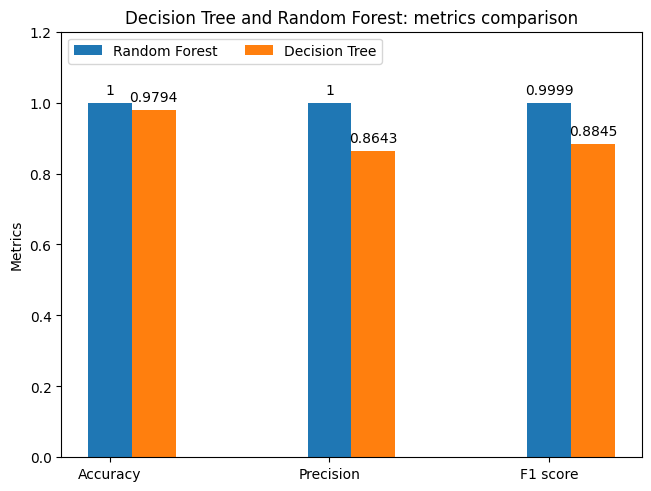

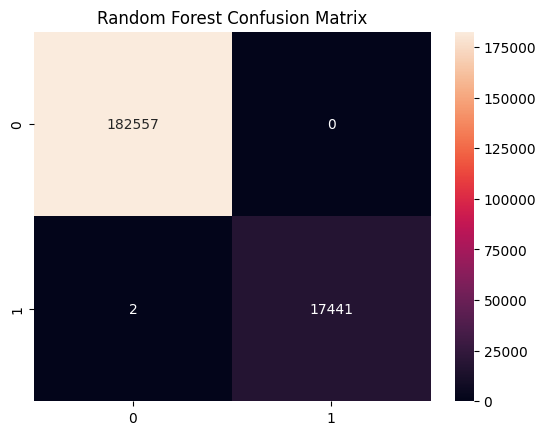

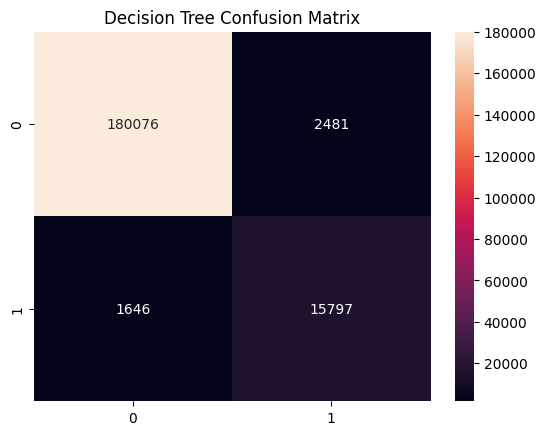

In [ ]:
#Bar chart to compare RandomForest and DecisionTree classifiers
metrics = ("Accuracy", "Precision", "F1 score")
model_evaluation = {
    'Random Forest': (accuracy_RanFor, precision_RanFor, f1score_RanFor),
    'Decision Tree': (accuracy_DecTree, precision_DecTree, f1score_DecTree )
}

x = np.arange(len(metrics))
width = 0.2
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in model_evaluation.items():
  print(attribute, measurement)
  offset = width * multiplier
  rects = ax.bar(x + offset, measurement, width, label=attribute)
  ax.bar_label(rects, padding=4)
  multiplier +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Decision Tree and Random Forest: metrics comparison')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1.2)
plt.show()

#compare Confusion Matrices of Decision Tree vs Random Forest
import seaborn as sns
sns.heatmap(confusion_RanFor, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

sns.heatmap(confusion_DecTree, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()




4. **Reflection and Discussion**:

Random Forest clearly performs better than Decision Tree in terms of Accuracy, Precision and F1 Score. Random Forest achieves a value or '1' for Accuracy and Precision, outperforming the 0.98 and 0.86, respectively, of the Decision Tree.

Here are a some of the reasons why the Random Forest model outperforms the Decision Tree:
1. Random Forest reduces overfitting by combining multiple trees, leading to better generalization on new, unseen data.
2. The aggregation of predictions from multiple trees often results in a more
Random Forest is less sensitive to outliers and noise in the data compared to individual Decision Trees.
3. Random Forest can handle imbalanced datasets more effectively. Our database was significantly imbalanced, with under 9% instances of fraud, so it makes sense that the Random Forest approach was able to outperform the Decision Tree.

However, the choice between Random Forest and Decision Trees may depend on factors like dataset size, interpretability, and computational resources. In some cases, a Decision Tree might be sufficient, while in others, the benefits of a Random Forest justify its use.

Finally, one last advantage (as considered in the following Extra Work), Random Forest provides a measure of feature importance, helping to identify the most critical features contributing to fraud detection.


# Extra Credit

1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.


In [ ]:
## extra credit
#oversampling: necessary as the FRAUD event rate is only 8.74%
#using SMOTE for oversampling (i.e. creating extra synthetic data to increase the number of instances for the minority class, FRAUD)

#analyze dataset
data.count()
print(data.shape)
#data.info( show_counts ='true')

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f'\n--- Before SMOTE -----')
print(f'Event Rate: {event_rate:.2f}% -- needs to be increased to balance dataset')
print(f'X_train shape: {X_train.shape}; y_train shape: {y_train.shape}')

print(f'\n--- After SMOTE: -----')
event_rate = y_res.mean() * 100
print(f'Event Rate: {event_rate:.2f}%')
print(f'X_res shape: {X_res.shape}; y_res shape: {y_res.shape}')

print(f'\n ** Oversampling performed - Dataset now balanced **')

(1000000, 8)

--- Before SMOTE -----
Event Rate: 50.00% -- needs to be increased to balance dataset
X_train shape: (800000, 7); y_train shape: (800000,)

--- After SMOTE: -----
Event Rate: 50.00%
X_res shape: (1460080, 7); y_res shape: (1460080,)

 ** Oversampling performed - Dataset now balanced **


2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.


In [ ]:
# Initialize and train Decision Tree classifier with new balanced dataset
model= RandomForestClassifier()
model.fit(X_res, y_res)

# Make predictions on the test data
y_pred = model.predict(X_test)

#Compute metrics
accuracy_RanFor_b = round(accuracy_score(y_test, y_pred),4)   #Accuracy for Random Forest model with balanced dataset
confusion_RanFor_b = confusion_matrix(y_test, y_pred)
classification_rep_RanFor_b = classification_report(y_test, y_pred)
precision_RanFor_b = round(precision_score(y_test, y_pred),4)
f1score_RanFor_b = round(f1_score(y_test, y_pred),4)

In [ ]:
#Cross validation to obtain cross-validated accuracy score, with balanced dataset
from sklearn.model_selection import cross_val_score

cross_val_scores_RanFor_b = cross_val_score(model, X_res, y_res, cv=5)
print(cross_val_scores_RanFor_b)

# The cross_val_score function provided by Sklearn is a powerful tool for evaluating machine learning models by providing cross-validated
# accuracy scores.
# This enables us to gain insights on the model's behavior across different data subsets and so that we may improve it.
# cross_val_score offers several advantages:
# 1. Insight into model performance: By obtaining accuracy score for each data point, we can analyze our model in detail
# to explore where it works fine and where it struggles.
# 2. Data efficiency: It ensures data efficiency as each data point is utilized for training and testing which maximizes the dataset's use.
# 3. Effective evaluation: We can assess the model's performance more accurately compared to a single train-test split.

[0.99984932 1.         0.99998973 0.9999863  0.9999863 ]


Cross validation Accuracy scores are consistant for our Random Forest model.

In [ ]:
#Using Decision Tree model for comparison, with the balanced dataset
model_d = DecisionTreeClassifier(max_depth=3)
model_d.fit(X_res, y_res)

# Make predictions on the test data
y_pred = model_d.predict(X_test)

# Evaluate the model
accuracy_DecTree_b = round(accuracy_score(y_test, y_pred),4)
confusion_DecTree_b = confusion_matrix(y_test, y_pred)
precision_DecTree_b = round(precision_score(y_test, y_pred),4)
f1score_DecTree_b = round(f1_score(y_test, y_pred),4)

Random Forest (1.0, 0.9999, 0.9999)
Decision Tree (0.9758, 0.7969, 0.8751)


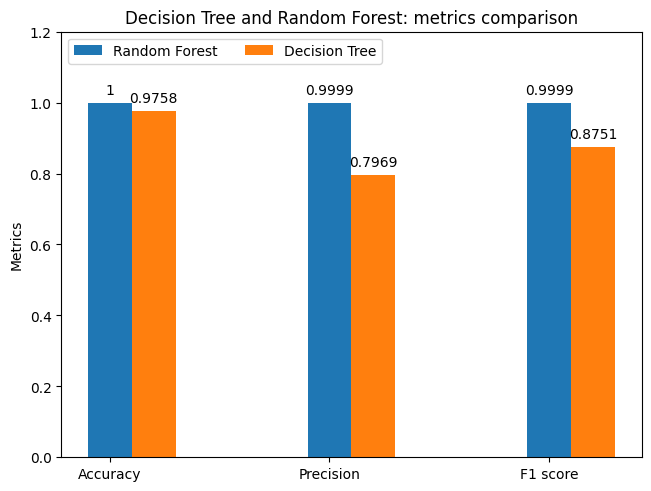

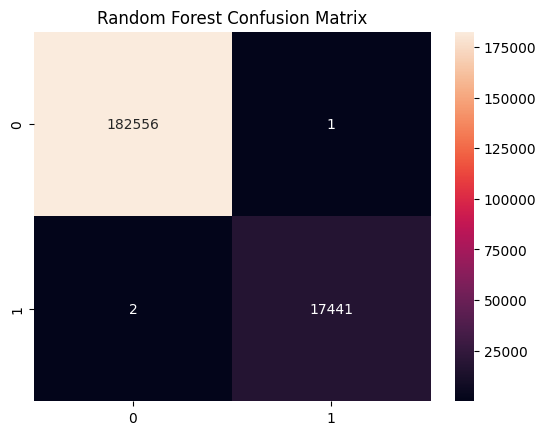

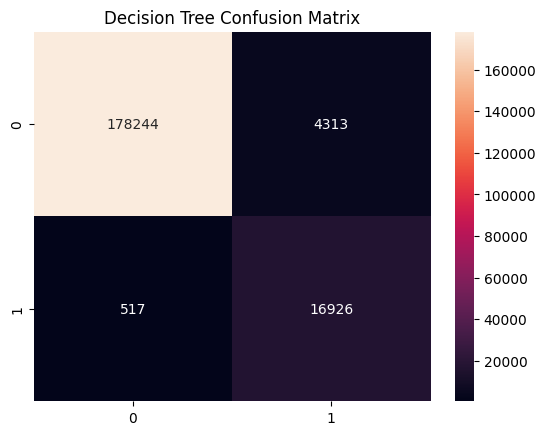

In [ ]:
#Bar chart to compare RandomForest and DecisionTree classifiers, with balanced dataset
metrics = ("Accuracy", "Precision", "F1 score")
model_evaluation = {
    'Random Forest': (accuracy_RanFor_b, precision_RanFor_b, f1score_RanFor_b),
    'Decision Tree': (accuracy_DecTree_b, precision_DecTree_b, f1score_DecTree_b)
}

x = np.arange(len(metrics))
width = 0.2
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in model_evaluation.items():
  print(attribute, measurement)
  offset = width * multiplier
  rects = ax.bar(x + offset, measurement, width, label=attribute)
  ax.bar_label(rects, padding=4)
  multiplier +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Decision Tree and Random Forest: metrics comparison - Balanced dataset')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1.2)
plt.show()

#compare Confusion Matrices of Decision Tree vs Random Forest
import seaborn as sns
sns.heatmap(confusion_RanFor_b, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

sns.heatmap(confusion_DecTree_b, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()


## Comments on results after balancing dataset

For the Random Forest, there was not much room for improvement. Cross validation confirmed that Accuracy was consistent and at its maximum value 100% (or 99.99%) through 5 different cross validations.

For the Decision Tree, the balanced dataset did not improve metrics. Precision and F1 score became worse. My interpretation is that with the balanced dataset there is more data to train on frauds but less data to train on non-fraudulent transactions, decreasing True Positives and almost doubling False Negatives.

A larger balanced dataset, and/or a Decision Tree with higher max-depth could be the way to go for better Precision and F1-score. The Random Forest model remains as a better model for this dataset, even if the training takes longer (around 3 minutes, compared to about 3 seconds for the Decision Tree).

3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

ratio_to_median_purchase_price: 0.5310
distance_from_home: 0.2058
online_order: 0.1148
distance_from_last_transaction: 0.0738
used_pin_number: 0.0340
used_chip: 0.0308
repeat_retailer: 0.0097


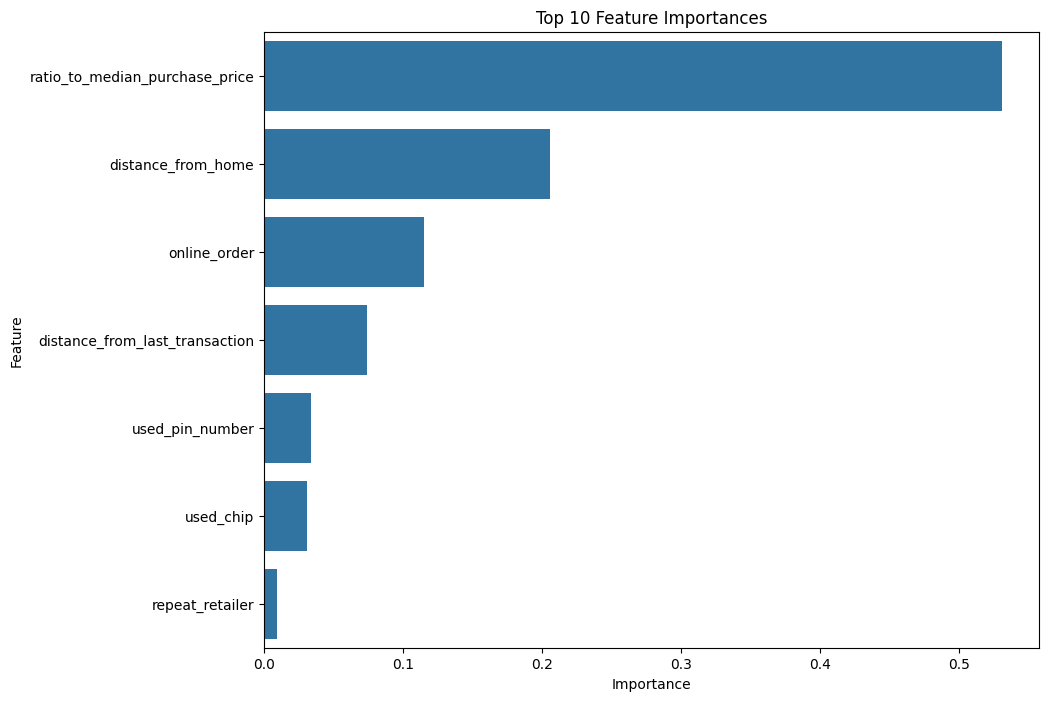

In [ ]:
# Calculate Variable Importance
feature_importance = pd.DataFrame({'Feature': X_res.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display Feature Importance
for feature, importance in zip(feature_importance['Feature'], feature_importance['Importance']):
    print(f"{feature:}: {importance:.4f}")

# Plot Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()

## Final conclusion on Feature Importance

"ratio_to_median_purchase_price" with a 53% importance score is by far the most important Feature when it comes to Fraud.
"distance_from_home" follows with a 20.6% importance score

Being able to obtain Feature Importance from the model greatly helps to understand which are the variables that mostly affect the output, to provide an interpretation and valuable insights. As Data Scientist this is vital as our bosses (or clients), want to listen to a story and do not really care about numbers or details on the models.

In [ ]:
## end of Laura's assignment

----------------------------------------------------------------------------------------------------------------------------------------------------------------
ASSIGNMENT DESCRIPTION FOLLOWS...

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

In [ ]:
#PAUL'S CODE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points



# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.
